In [1]:
%load_ext autoreload
%autoreload 2
import os
from SRtools import sr_mcmc as srmc
import argparse
from SRtools import config_lib as cl
from SRtools import deathTimesDataSet as dtds
import ast
from SRtools import readResults as rr
from SRtools import readResultsBaysian as rrb
import corner
import matplotlib.pyplot as plt
import matplotlib
from SRtools import SRmodellib as sr
from SRtools import SRmodellib_lifelines as srl
import emcee
import numpy as np
from SRtools import SR_hetro as srh
from SRtools import presets
import matplotlib.pyplot as plt
from SRtools import readResultsBaysian as rrb
from matplotlib import image as mpimg
from matplotlib import offsetbox
from SRtools import utils
from SRtools import plotting_utils as pu

In [2]:
save_fig = True
filetype = 'jpeg'

In [3]:
path ='results/summery_mode.csv'

In [4]:
lifespan_param = 'best fit no ext hazard_MedianLifetime'

In [5]:
# columns=[
#     'ecoli',
#     'mice_M', 'mice_F', 'yeast', 'celegance', 
#     'cats_BPH', 
#     'drosophila_853', 'drosophila_707', 'drosophila_441', 'drosophila_217',
#     'humans_M_combined', 'humans_F_combined', 
#     'Staffy_vetCompass', 'Labradors_vetCompass', 'Jack_Russell_vetCompass', 'German_Shepherd_vetCompass'
#     ]

columns = ['mice_F','mice_M','yeast','ecoli', 'cats_vp_M', 'cats_vp_F',
        'drosophila_853','drosophila_707','drosophila_441','drosophila_217',
        'Sweden_M_1910_hetro','Sweden_F_1910_hetro','Denmark_M_1900_hetro','Denmark_M_1890_hetro',
        'Staffy_vetCompass','Labradors_vetCompass','Jack_Russell_vetCompass','German_Shepherd_vetCompass',
        'Denmark_F_1890_hetro',
        'celegans','Denmark_F_1900_hetro','Guiniea_pig_VC','combined_human_F','combined_human_M']

values_by_param, ci_by_param, selected_value_columns = utils.read_summary_csv(path,columns=columns)

mam_columns = ['mice_F','cats_vp_M','combined_human_F','Guiniea_pig_VC','Labradors_vetCompass']
mam_columns2 = ['mice_M','cats_vp_F','combined_human_M', 'Staffy_vetCompass','Jack_Russell_vetCompass','German_Shepherd_vetCompass',]

sil = utils.get_summery_csv_df(path,columns=mam_columns)
sil2 = utils.get_summery_csv_df(path,columns=mam_columns2)

In [6]:
print(values_by_param.keys())

dict_keys(['xc/eta', 'beta/eta', 'xc^2/epsilon', 'xc', 'eta', 'beta', 'epsilon', 'sqrt(xc/eta)', 's= eta^0.5*xc^1.5/epsilon', 'beta*xc/epsilon', 'eta*xc/epsilon', 'Fx=beta^2/eta*xc', 'Dx =beta*epsilon/eta*xc^2', 'Pk=beta*k/epsilon', 'Fk=beta^2/eta*k', 'Dk =beta*epsilon/eta*k^2', 'Fk^2/Dk=beta^3/eta*epsilon', 'epsilon/beta^2', 'k/beta', 'k^2/epsilon', 'best fit no ext hazard_MedianLifetime', 'best fit no ext hazard_MaxLifetime', 'best fit_MedianLifetime', 'best fit_MaxLifetime', 'data_MedianLifetime', 'data_MaxLifetime', 'ML_lnprob', 'ExtH', 'eta/xc', 'beta/xc', 'epsilon/xc^2', 'k/xc'])


In [7]:


file_image_dict={
    'mice_F': 'silhouetts/Mice.jpg',
    'celegans': 'silhouetts/Celegance.jpeg',
    'Labradors_vetCompass': 'silhouetts/Labrador.jpg',
    'drosophila_441': 'silhouetts/drosophila.jpeg',
    'cats_vp_M': 'silhouetts/cat silhouette.jpeg',
    'combined_human_F': 'silhouetts/man silhouette.jpeg',
    'yeast': 'silhouetts/yeast.jpeg',
    'ecoli': 'silhouetts/ecoli.jpeg',
    'Guiniea_pig_VC': 'silhouetts/guinea_pig_silhouette.jpeg',
}



fact_zoom=0.8
x_offset_fact =1.2
zooms = {
    'mice_F': 0.015*fact_zoom,
    'celegans': 0.0125*fact_zoom,
    'Labradors_vetCompass': 0.02*fact_zoom,
    'drosophila_441': 0.01*fact_zoom,
    'cats_vp_M': 0.02*fact_zoom,
    'combined_human_F': 0.025*fact_zoom,
    'yeast': 0.01*fact_zoom,
    'ecoli': 0.01*fact_zoom,
    'Guiniea_pig_VC': 0.01*fact_zoom,
}


directions = {
    'mice_F': -1,
    'celegans': -1,
    'Labradors_vetCompass': -1,
    'drosophila_441': 1,
    'cats_vp_M': 1,
    'combined_human_F': 1,
    'yeast': 1,
    'ecoli': 1,
    'Guiniea_pig_VC': 1,
}



offsets_eta = {
    'mice_F': [1*x_offset_fact,-3],
    'celegans': [2*x_offset_fact,0],
    'Labradors_vetCompass': [2.5*x_offset_fact,0],
    'drosophila_441': [3*x_offset_fact,0],
    'cats_vp_M': [3*x_offset_fact,-3.5],
    'combined_human_F': [3*x_offset_fact,-1.5],
    'yeast': [3.2*x_offset_fact,0],
    'ecoli': [3.5*x_offset_fact,-1],
    'Guiniea_pig_VC': [3.5*x_offset_fact,-1],
}

# directions = {
#     'Mice_F': 0,
#     'Celegance': 0,
#     'Dog_Labrador': 0,
#     'Drosophila': 0,
#     'Cats': 0,
#     'Human_M': 0,
# }



plot_props_eta = rrb.getPlotPropsImages(file_image_dict=file_image_dict, zooms=zooms,offset=offsets_eta,directions=directions)






offsets_beta_eta = {
    'mice_F': [1,-1.5],
    'celegans': [2.,0],
    'Labradors_vetCompass': [2.5,0],
    'drosophila_441': [3,1],
    'cats_vp_M': [3,0],
    'combined_human_F': [2.8,0],
    'yeast': [3.2*x_offset_fact,1],
    'ecoli': [3.5*x_offset_fact,0],
    'Guiniea_pig_VC': [3.5*x_offset_fact,0],
}




plot_props_beta_eta = rrb.getPlotPropsImages(file_image_dict=file_image_dict, zooms=zooms,offset=offsets_beta_eta,directions=directions)


offsets_beta1 = {
    'mice_F': [1,0],
    'Labradors_vetCompass': [2.,0],
    'cats_vp_M': [2,0],
    'combined_human_F': [2.8,-2],
    'Guiniea_pig_VC': [2.5,1.5],
}

plot_props_beta1 = rrb.getPlotPropsImages(file_image_dict=file_image_dict, zooms=zooms,offset=offsets_beta1,directions=directions)


In [8]:
alpha_1 =0.2
color = 'darkorange'
marker_size = 6
markeredgewidth = 1
marker = 'o'

plot_props_beta2 = {
    # 'combined_human_M': {'color': color, 'marker': marker, 'label': 'Human Male', 'alpha': alpha_1, 'markersize': marker_size, 'markeredgewidth': markeredgewidth},
    'combined_human_M': {'color': color, 'marker': marker, 'label': 'Human Female', 'alpha': alpha_1, 'markersize': marker_size, 'markeredgewidth': markeredgewidth},
    # 'ecoli': {'color': color, 'marker': marker, 'label': 'E. coli', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'Jack_Russell_vetCompass': {'color': color, 'marker': marker, 'label': 'Jack Russell', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'Labradors_vetCompass': {'color': color, 'marker': marker, 'label': 'Labrador', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'Staffy_vetCompass': {'color': color, 'marker': marker, 'label': 'Staffy', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'German_Shepherd_vetCompass': {'color': color, 'marker': marker, 'label': 'German Shepherd', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'cats_vp_M': {'color': color, 'marker': marker, 'label': 'Cats', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'cats_vp_F': {'color': color, 'marker': marker, 'label': 'Cats', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'mice_F': {'color': color, 'marker': marker, 'label': 'Mice Female', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'mice_M': {'color': color, 'marker': marker, 'label': 'Mice Male', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'celegans': {'color': color, 'marker': marker, 'label': 'C. elegans', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'drosophila_853': {'color': color, 'marker': marker, 'label': 'Drosophila genotype 853', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'drosophila_441': {'color': color, 'marker': marker, 'label': 'Drosophila genotype 441', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'drosophila_707': {'color': color, 'marker': marker, 'label': 'Drosophila genotype 707', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'drosophila_217': {'color': color, 'marker': marker, 'label': 'Drosophila genotype 217', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'yeast': {'color': color, 'marker': marker, 'label': 'Yeast', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'Guiniea_pig_VC': {'color': color, 'marker': marker, 'label': 'Guinea Pig', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
}

In [9]:
alpha_1 =0.2
color = 'darkblue'
marker_size = 6
markeredgewidth = 1
marker = 'o'

plot_props_eps2 = {
    # 'combined_human_M': {'color': color, 'marker': marker, 'label': 'Human Male', 'alpha': alpha_1, 'markersize': marker_size, 'markeredgewidth': markeredgewidth},
    'combined_human_M': {'color': color, 'marker': marker, 'label': 'Human Female', 'alpha': alpha_1, 'markersize': marker_size, 'markeredgewidth': markeredgewidth},
    # 'ecoli': {'color': color, 'marker': marker, 'label': 'E. coli', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'Jack_Russell_vetCompass': {'color': color, 'marker': marker, 'label': 'Jack Russell', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'Labradors_vetCompass': {'color': color, 'marker': marker, 'label': 'Labrador', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'Staffy_vetCompass': {'color': color, 'marker': marker, 'label': 'Staffy', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'German_Shepherd_vetCompass': {'color': color, 'marker': marker, 'label': 'German Shepherd', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'cats_vp_M': {'color': color, 'marker': marker, 'label': 'Cats', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'cats_vp_F': {'color': color, 'marker': marker, 'label': 'Cats', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'mice_F': {'color': color, 'marker': marker, 'label': 'Mice Female', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    'mice_M': {'color': color, 'marker': marker, 'label': 'Mice Male', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'celegans': {'color': color, 'marker': marker, 'label': 'C. elegans', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'drosophila_853': {'color': color, 'marker': marker, 'label': 'Drosophila genotype 853', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'drosophila_441': {'color': color, 'marker': marker, 'label': 'Drosophila genotype 441', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'drosophila_707': {'color': color, 'marker': marker, 'label': 'Drosophila genotype 707', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'drosophila_217': {'color': color, 'marker': marker, 'label': 'Drosophila genotype 217', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'yeast': {'color': color, 'marker': marker, 'label': 'Yeast', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
    # 'Guiniea_pig_VC': {'color': color, 'marker': marker, 'label': 'Guinea Pig', 'alpha': alpha_1, 'markersize': marker_size, 'markerfacecolor': 'none', 'markeredgewidth': markeredgewidth},
}

# Figure invariants

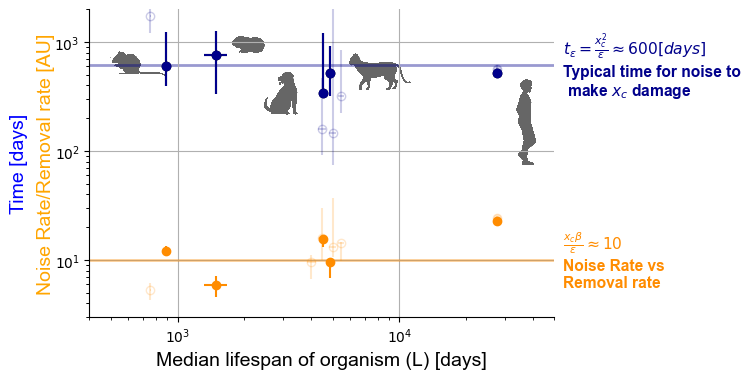

In [10]:
sf = 0.4

fig_size = (15*sf, 10*sf) 
fig, ax = plt.subplots(figsize=fig_size)
# fig.subplots_adjust(wspace=0.4) 



# if i in [8,7,6]:
#     dparam = idict[20]
# elif i in [11,2,3]:
#     mparam = idict[20]
# elif i in[1]:
#     mparam = [idict[20],idict[20]]

title_font = {'fontname':'Arial', 'size':f'{22*sf}', 'color':'black', 'weight':'normal'}
axis_font = {'fontname':'Arial', 'size':f'{35*sf}','weight':'normal'}
text_font = {'fontname':'Arial', 'size':f'{28*sf}','weight':'bold'}
npad = 10

i = 2
dparam = None
mparam = None
#color the part of the plot below y=1 in light grey
# ax.fill_between(x, y, 1, , color='grey', alpha=0.5)
# _, _,_,_,_,_, fig,plot_props0 =rr.plotParams2D(mammels,ax=ax,param2=idict[i],multiply_param2=mparam,divide_by_param2=dparam,param1=idict[20],divide_by_param1=None,yscale='log',xscale='log',
#                                                full_output=True,legend = False,plot_props_images=plot_props_beta1,best_fit=False,image_color='darkorange', drop_images=True,shift_y=2)
_, _,_,_,_,_, fig,plot_props0 = pu.plotParams2D(
    sil, ax=ax, param2='beta*xc/epsilon', multiply_param2=mparam, divide_by_param2=dparam, param1=lifespan_param,
    divide_by_param1=None, yscale='log', xscale='log',
    full_output=True, legend=False, plot_props_images=plot_props_beta1, best_fit=False, image_color='darkorange', drop_images=True
)

_, _,_,_,_,_, fig,plot_props0= pu.plotParams2D(
    sil2, ax=ax, param2='beta*xc/epsilon', multiply_param2=mparam, divide_by_param2=dparam, param1=lifespan_param,
    divide_by_param1=None, yscale='log', xscale='log',
    full_output=True, legend=False, best_fit=False, plot_props = plot_props_beta2
)
i = 7
_, _,_,_,_,_, fig,plot_props0 = pu.plotParams2D(
    sil, ax=ax, param2='xc^2/epsilon', multiply_param2=mparam, divide_by_param2=dparam, param1=lifespan_param,
    divide_by_param1=None, yscale='log', xscale='log',
    full_output=True, legend=False, plot_props_images=plot_props_beta1, best_fit=False, image_color='black'
)

_, _,_,_,_,_, fig,plot_props0 = pu.plotParams2D(
    sil, ax=ax, param2='xc^2/epsilon', multiply_param2=mparam, divide_by_param2=dparam, param1=lifespan_param,
    divide_by_param1=None, yscale='log', xscale='log',
    full_output=True, legend=False, plot_props_images=plot_props_beta1, best_fit=False, image_color='darkblue', drop_images=True
)

_, _,_,_,_,_, fig,plot_props0 = pu.plotParams2D(
    sil2, ax=ax, param2='xc^2/epsilon', multiply_param2=mparam, divide_by_param2=dparam, param1=lifespan_param,
    divide_by_param1=None, yscale='log', xscale='log',
    full_output=True, legend=False, best_fit=False, plot_props = plot_props_eps2
)

i = 14

ax.set_title('Damage production parameter $\\eta$ inversely correlates with lifespan', pad=ax.title.get_position()[1] + npad, **title_font)
# Combine two differently colored y-labels: blue for left, orange for left secondary (dummy axis)
# Shift main y label to the left with labelpad
ax.set_ylabel("Time [days]", color='blue', labelpad=19, **axis_font)
ax.figure.canvas.draw_idle()

# Create a secondary y-axis on the left (overlapping) for the orange label, and remove its ticks
ax2 = ax.secondary_yaxis('left')
# Shift secondary y label even further left with labelpad (bigger than the main one)
ax2.set_ylabel(r"Noise Rate/Removal rate [AU]", color='orange', labelpad=19, **axis_font)
ax2.set_yticks([])
ax2.tick_params(left=False, right=False)  # Remove tick marks

# Hide all spines for clarity
for spine in ['right', 'left', 'top', 'bottom']:
    ax2.spines[spine].set_visible(False)

ax.set_xlabel('Median lifespan of organism (L) [days]', **axis_font)
ax.set_xlim(400, 50000)
ax.set_ylim(3, 2000)
# ax.set_yscale('linear')
alpha = 0.4
ha = 'left'
tx = 55000
lw = 2
ax.axhline(610, color='darkblue', linestyle='-', lw=lw, alpha=alpha, zorder=0)
ax.text(tx, 610, r'$t_\epsilon=\frac{x_c^2}{\epsilon}\approx 600[days]$'+'\nTypical time for noise to \n make $x_c$ damage',
         verticalalignment='center', horizontalalignment=ha, color='darkblue', **text_font)

ax.axhline(10, color='darkorange', linestyle='-', lw=lw, alpha=alpha)
ax.text(tx, 10, r'$\frac{x_c\beta}{\epsilon}\approx 10$'+'\nNoise Rate vs\nRemoval rate  ',
         verticalalignment='center', horizontalalignment=ha, color='darkorange', **text_font)



# Remove title
ax.title.set_visible(False)



if save_fig:
    fig.savefig(f'plots/Fig_mammles_Silhouetts_times.{filetype}', bbox_inches='tight', format=filetype, transparent=True)


# Old

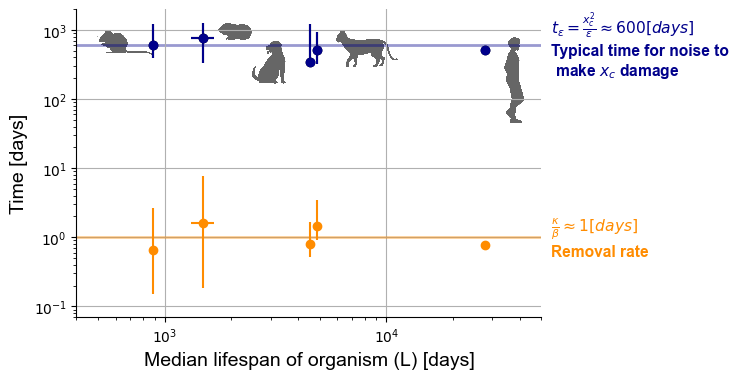

In [11]:
sf =0.4

fig_size = (15*sf,10*sf) 
fig, ax = plt.subplots(figsize=fig_size)
# fig.subplots_adjust(wspace=0.4) 




# if i in [8,7,6]:
#     dparam = idict[20]
# elif i in [11,2,3]:
#     mparam = idict[20]
# elif i in[1]:
#     mparam = [idict[20],idict[20]]

title_font = {'fontname':'Arial', 'size':f'{22*sf}', 'color':'black', 'weight':'normal'}
axis_font = {'fontname':'Arial', 'size':f'{35*sf}','weight':'normal'}
text_font = {'fontname':'Arial', 'size':f'{28*sf}','weight':'bold'}
npad =10



i =2
dparam = None
mparam = None
#color the part of the plot below y=1 in light grey
# ax.fill_between(x, y, 1, , color='grey', alpha=0.5)
# _, _,_,_,_,_, fig,plot_props0 =rr.plotParams2D(mammels,ax=ax,param2=idict[i],multiply_param2=mparam,divide_by_param2=dparam,param1=idict[20],divide_by_param1=None,yscale='log',xscale='log',
#                                                full_output=True,legend = False,plot_props_images=plot_props_beta1,best_fit=False,image_color='darkorange', drop_images=True,shift_y=2)
_, _,_,_,_,_, fig,plot_props0 =pu.plotParams2D(sil,ax=ax,param2='k/beta',multiply_param2=mparam,divide_by_param2=dparam,param1=lifespan_param,divide_by_param1=None,yscale='log',xscale='log',
                                               full_output=True,legend = False,plot_props_images=plot_props_beta1,best_fit=False,image_color='darkorange', drop_images=True)
i =7
_, _,_,_,_,_, fig,plot_props0 =pu.plotParams2D(sil,ax=ax,param2='xc^2/epsilon',multiply_param2=mparam,divide_by_param2=dparam,param1=lifespan_param,divide_by_param1=None,yscale='log',xscale='log',
                                               full_output=True,legend = False,plot_props_images=plot_props_beta1,best_fit=False,image_color='black')

_, _,_,_,_,_, fig,plot_props0 =pu.plotParams2D(sil,ax=ax,param2='xc^2/epsilon',multiply_param2=mparam,divide_by_param2=dparam,param1=lifespan_param,divide_by_param1=None,yscale='log',xscale='log',
                                               full_output=True,legend = False,plot_props_images=plot_props_beta1,best_fit=False,image_color='darkblue', drop_images=True)

i =14
# _, _,_,_,_,_, fig,plot_props0 =rr.plotParams2D(mammels,ax=ax,param2=idict[i],multiply_param2=mparam,divide_by_param2=dparam,param1=idict[20],yscale='log',xscale='log',
#                                                full_output=True,legend = False,plot_props_images=plot_props_beta1,best_fit=False,image_color='darkturquoise',drop_images=True,shift_y=100)
ax.set_title('Damage production parameter $\\eta$ inversely correlates with lifespan', pad=ax.title.get_position()[1] + npad, **title_font)
# rr.plotParams2D(sil,ax=ax,param2=idict[i],multiply_param2=mparam,divide_by_param2=dparam,param1=idict[20],divide_by_param1=None,yscale='log',xscale='log',full_output=False,legend = False)
ax.set_ylabel('Time [days]', **axis_font)
ax.set_xlabel('Median lifespan of organism (L) [days]', **axis_font)
ax.set_xlim(400, 50000)
ax.set_ylim(0.07, 2000)
# ax.set_yscale('linear')
alpha =0.4
ha ='left'
tx = 55000
lw=2
ax.axhline(610, color='darkblue', linestyle='-',lw=lw, alpha=alpha, zorder =0)
ax.text(tx, 610, r'$t_\epsilon=\frac{x_c^2}{\epsilon}\approx 600[days]$'+'\nTypical time for noise to \n make $x_c$ damage',
         verticalalignment='center',horizontalalignment=ha, color='darkblue',**text_font)

ax.axhline(1, color='darkorange', linestyle='-',lw=lw, alpha=alpha)
ax.text(tx, 1, r'$\frac{\kappa}{\beta}\approx 1 [days]$'+'\nRemoval rate ',
         verticalalignment='center',horizontalalignment=ha, color='darkorange',**text_font)

# ax.axhline(12, color='turquoise', linestyle='-', alpha=alpha)
# ax.text(tx, 12, r'$100R_{\epsilon\beta}=\frac{\beta\kappa}{\epsilon}\approx100\cdot0.1$'+'\n Rate of noise to rate of \nremoval in units of half \nsaturation point $\kappa$ ',
#          verticalalignment='center',horizontalalignment=ha, color='darkturquoise',**text_font)

#remove title
ax.title.set_visible(False)

if False:
    fig.savefig(f'plots/Fig_mammles_Silhouetts_times.{filetype}',bbox_inches='tight',format=filetype,transparent=True)
